In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Phase 1: testing/mungling/... (notebook `.ipynb`)

In [3]:
data = pd.read_csv("../data/vmm_flowdata.csv", parse_dates=True, index_col=0).dropna()

In [4]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


## Implementing a model evaluation criteria

Root mean squared error (**numpy** based) - testing of function

In [5]:
modelled = data["L06_347"].values
observed = data["LS06_347"].values

In [6]:
residuals = observed - modelled

In [7]:
np.sqrt((residuals**2).mean())

0.058413036151786404

Converting this to a small function, to easily reuse the code - **[add docstring(!)](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html)**:

In [8]:
def root_mean_square_error(observed, modelled):
    '''
    Root Mean Square Error (RMSE)

    Parameters
    -----------
    observed : np.ndarray or pd.DataFrame
        observed/measured values of the variable
    observed : np.ndarray or pd.DataFrame
        simulated values of the variable
        
    Notes
    -------
    * range: [0, inf]
    * optimum: 0
    '''
    residuals = observed - modelled
    return np.sqrt((residuals**2).mean())

Test the created function:

In [9]:
root_mean_square_error(data["L06_347"].values, data["LS06_347"].values)

0.058413036151786404

In [11]:
#root_mean_square_error() # remove the comment, SHIFT-TAB inside the brackets and see your own docstring

Very brief basic/minimal setup of a docstring:

    '''very brief one-line function description
    A more extended description about the function...
    ...which can take multiple lines if required

    Parameters
    -----------
    inputname1 : dtype of inputname1
        description of the first input 
    inputname2 : dtype of inputname2
        description of the second input 
    ...
    
    Returns
    -------
    out1 : dtype of output
        description of the first output
    ...
        
    Notes
    -------
    Some information about your function,...
    '''

## Making a plot function

When making the plot, I still want the degrees of freedom to change the colors, linewidt,.. of the figure when using my figure:

Compare:

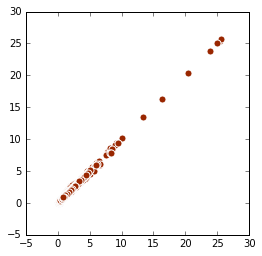

In [24]:
fig, axs = plt.subplots()    
axs.scatter(data["L06_347"].values, data["LS06_347"].values, 
            color="#992600", s=50, edgecolor='white')
axs.set_aspect('equal')

with: 

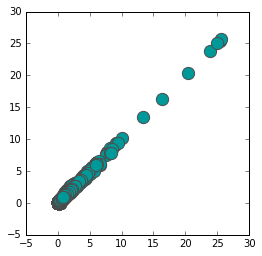

In [30]:
fig, axs = plt.subplots()    
axs.scatter(data["L06_347"].values, data["LS06_347"].values, 
            color="#009999", s=150, edgecolor='0.3')
axs.set_aspect('equal')

When making a plot function, you want to keep this flexibility. 

Some options:
* use the `args, kwargs` construction, which provides the option to pipe a flexible amount of inputs from your function input towards the plot function
* Adapt everything on a `ax` object in order to make result further adaptable afterwards (# you don't have to return the ax, but you actually can)

In [88]:
def dummy_plot_wrapper(ax, *args, **kwargs):
    """small example function to illustrate some plot concepts"""
    x = np.linspace(1, 5, 30)
    ax.plot(x, x**2, *args, **kwargs)

With this setup, you have the following degrees of freedom:

<p style="color#A9A9A9;  font-size: 1.3em;">
- without usage of additional arguments, but adapting the ax object further outside my function:
</p>

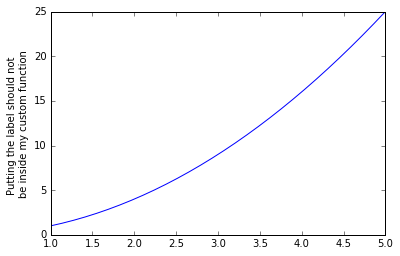

In [89]:
fig, ax = plt.subplots()
dummy_plot_wrapper(ax)
ax.set_ylabel('Putting the label should not \nbe inside my custom function')

Working on the ax-object inside a function, also provides flexibility to use the same function (or two functions) to fill different subplots of matplotlib:

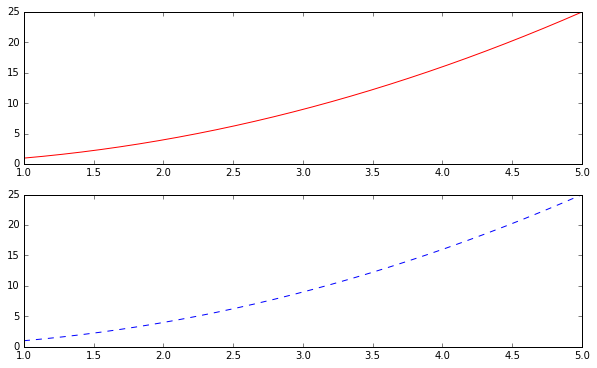

In [92]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
dummy_plot_wrapper(ax1, 'r-')
dummy_plot_wrapper(ax2, 'b--')

<p style="color#A9A9A9;  font-size: 1.3em;">
- adding additional style features with providing additional arguments:
</p>

(As we pipe the arguments to the plot() function of matplotlib, the choices of the additional arguments are the plot options of matplotlib itself: http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D)

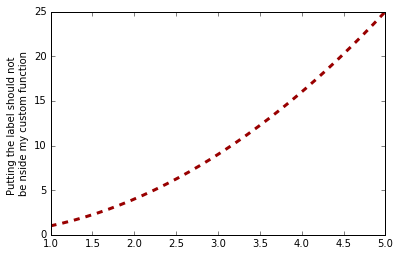

In [50]:
fig, ax = plt.subplots()
dummy_plot_wrapper(ax, linestyle='--', linewidth=3, color="#990000")
ax.set_ylabel('Putting the label should not \nbe nside my custom function')

<p style="color#A9A9A9;  font-size: 1.3em;">
- adding additional style features with providing additional arguments and adapting the graph afterwards:
</p>

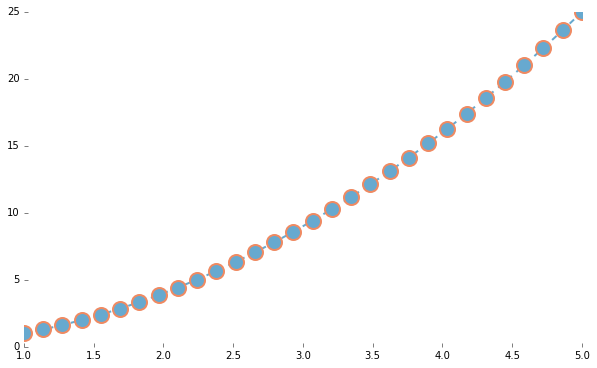

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
dummy_plot_wrapper(ax, linewidth=2, color="#67a9cf", 
                   marker='o', linestyle='--', 
                   markeredgecolor='#ef8a62', 
                   markersize=15,
                   markeredgewidth=2) 

# removing the spines of the graph afterwards
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

If you use an option frequently after plotting a graph (but maybe not always), it could be an option to add it with a named argument to your function:

In [112]:
def dummy_plot_wrapper(ax, remove_spines=None, *args, **kwargs):
    """small example function to illustrate some plot concepts
    
    Parameters
    ----------
    ax : plt.ax object
        an axis to put the data on
    remove_spines : None | list of 'left', 'bottom', 'right', 'top'
        will remove the spines according to the defined sides inside the list
    *args, **kwargs : 
        commands provided to the 2D line plot of matplotlib
    """
    x = np.linspace(1, 5, 30)
    ax.plot(x, x**2, *args, **kwargs)
    
    if remove_spines and isinstance(remove_spines, list):
        for key, spine in ax.spines.items():
            if key in remove_spines:
                spine.set_visible(False)

So, we added this flexibility to our own graph:

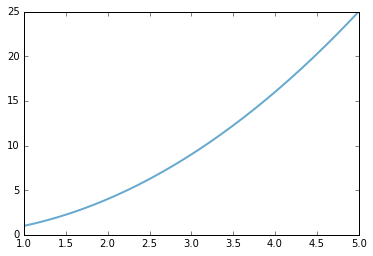

In [113]:
fig, ax = plt.subplots()
dummy_plot_wrapper(ax, linewidth=2, color="#67a9cf") # no information about removing spines, just as before -> default is used

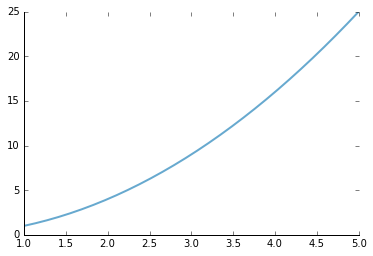

In [114]:
fig, ax = plt.subplots()
dummy_plot_wrapper(ax, remove_spines=['right', 'top'], 
                   linewidth=2, color="#67a9cf")

# Phase 2: I've got something useful here...

When satisfied about the function behavior: move it to a python (`.py`) file...


## Writing the useful elements into a function (towards python file `.py`)

Check the file [spreaddiagram](spreaddiagram.py) as an example... 



**Some advice:**

* Keep the functionalities small:
    * A single function has a single task
    * Keep the number of lines restricted (< 50 lines), unless you have good reasons
* Write [**docstrings**](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html)(!)
* Make your function more flexible with arguments and **named arguments**

## Using your function for real (anywhere: new notebooks `.ipynb`, new `.py` files)

Loading from my custom function

In [121]:
from spreaddiagram import spread_diagram, bias, root_mean_square_error

Using my new function:

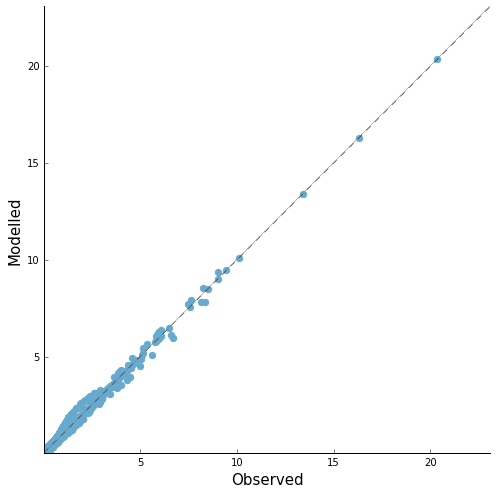

In [130]:
fig, ax = plt.subplots(figsize=(8, 8))

spread_diagram(ax, data["L06_347"].values, 
               data["LS06_347"].values, 
               infobox = False, 
               color="#67a9cf", 
               s=40)
ax.set_ylabel("Modelled", fontsize=15)
ax.set_xlabel("Observed", fontsize=15)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

**Remark**: when you have to select colors: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

In many occassions, the story will end here and you will further use/adapt the function...

**Advice:** use [version control](https://git-scm.com/book/en/v2/Getting-Started-About-Version-Control) and keep track of your changes! This is not only for IT-guy, with [Github desktop](https://desktop.github.com/), version control becomes accessible for everyone

However, sometimes you need further adaptation:

# Phase 3 (optional): It is a recurrent task (towards cmd/bash functionality)

When using this on regular basis (e.g. you frequently get output text files from a model), it is worthwile to make the same functionality available outside python as well (as command line function or inside bash scripts)!

A minimal working template:

In [131]:
%%file puretest.py

import sys


def main(argv=None):
    # first argument argv[0] is always the python file name itself
    print('Working on the', argv[0], 'file, with the argument', argv[1]) 
    

if __name__ == "__main__":
    sys.exit(main(sys.argv))    

Overwriting puretest.py


**Want to dive into the command line options?**
* example with more advanced arguments: https://github.com/inbo/inbo-pyutils/blob/master/gbif/gbif_name_match/gbif_species_name_match.py
* pure python library to support you on the argument parsing: https://docs.python.org/3/library/argparse.html
* library for more advanced support (eacy creation of cmd interface): http://click.pocoo.org/5/

# Phase 4 (optional): You need more python power (towards python package)

* When working together with other people on the code, 
* when requiring more advance management of the code, 
* when installation on new machines should be more easy
* when you want to make your code installable by others
* ...

**Create a package from your code...**

As an example: https://github.com/inbo/data-validator

* Actually it is not that much more as a set of files in a folder accompanied with a `setup.py` file
* register on [pypi](https://pypi.python.org/pypi) and people can install your code with: `pip install your_awesome_package_name`
* Take advantage of **unit testing**, **code coverage**,... the enlightning path of code development!
